<a href="https://colab.research.google.com/github/midnightstar22/Nutrition-app/blob/main/nutrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub --quiet


In [ ]:
# !pip install kagglehub --quiet

import kagglehub
import zipfile
import os

# Download the dataset ZIP file (returns .zip file path)
zip_path = kagglehub.dataset_download("trolukovich/food11-image-dataset")

print("Downloaded ZIP file at:", zip_path)


100%|██████████| 1.08G/1.08G [00:11<00:00, 105MB/s]

Extracting files...


Downloaded ZIP file at: /root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1


In [ ]:
import os

# The path returned by kagglehub
path = "/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1"

# List contents to see what's inside
os.listdir(path)


['validation', 'evaluation', 'training']

In [ ]:
train_path = "/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1/training"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7896 images belonging to 11 classes.
Found 1970 images belonging to 11 classes.


In [ ]:
from tensorflow.keras import layers, models

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_gen, epochs=5, validation_data=val_gen)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,059 (12.61 MB)

 Trainable params: 3,306,059 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.2117 - loss: 2.2750 - val_accuracy: 0.3122 - val_loss: 1.9940
Epoch 2/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.3485 - loss: 1.8601 - val_accuracy: 0.3777 - val_loss: 1.7527
Epoch 3/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.4603 - loss: 1.5688 - val_accuracy: 0.4025 - val_loss: 1.7217
Epoch 4/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.5385 - loss: 1.3396 - val_accuracy: 0.4548 - val_loss: 1.6639
Epoch 5/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.6347 - loss: 1.0708 - val_accuracy: 0.4680 - val_loss: 1.6420


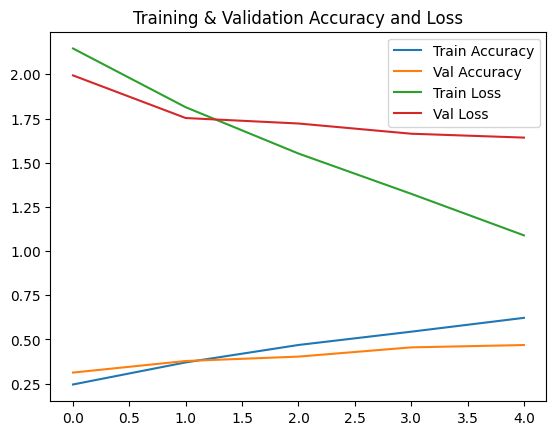

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training & Validation Accuracy and Loss')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the validation set
val_gen.reset()  # reset generator state
preds = model.predict(val_gen, verbose=1)
pred_classes = np.argmax(preds, axis=1)
true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_1" is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (32, 41472)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 160, 160, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
print("📋 Classification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=class_labels))


📋 Classification Report:



NameError: name 'true_classes' is not defined

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Plot with seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('🍽️ Food11 - Confusion Matrix')
plt.show()


NameError: name 'true_classes' is not defined

In [ ]:
train_path = "/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1/training"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(160, 160),  # MobileNetV2 input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7896 images belonging to 11 classes.
Found 1970 images belonging to 11 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load base model (excluding top dense layers)
base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze all layers

# Add new top layers for Food11
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,371 (9.24 MB)

 Trainable params: 165,387 (646.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(train_gen, epochs=5, validation_data=val_gen)


Epoch 1/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.5564 - loss: 1.3612 - val_accuracy: 0.7741 - val_loss: 0.6892
Epoch 2/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 205s 830ms/step - accuracy: 0.8046 - loss: 0.5885 - val_accuracy: 0.7893 - val_loss: 0.6265
Epoch 3/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 216s 874ms/step - accuracy: 0.8342 - loss: 0.5061 - val_accuracy: 0.7959 - val_loss: 0.6242
Epoch 4/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 208s 844ms/step - accuracy: 0.8696 - loss: 0.4002 - val_accuracy: 0.8056 - val_loss: 0.6000
Epoch 5/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 212s 859ms/step - accuracy: 0.8928 - loss: 0.3193 - val_accuracy: 0.8061 - val_loss: 0.6150


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

train_aug = augmented_datagen.flow_from_directory(
    train_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_aug = augmented_datagen.flow_from_directory(
    train_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7896 images belonging to 11 classes.
Found 1970 images belonging to 11 classes.


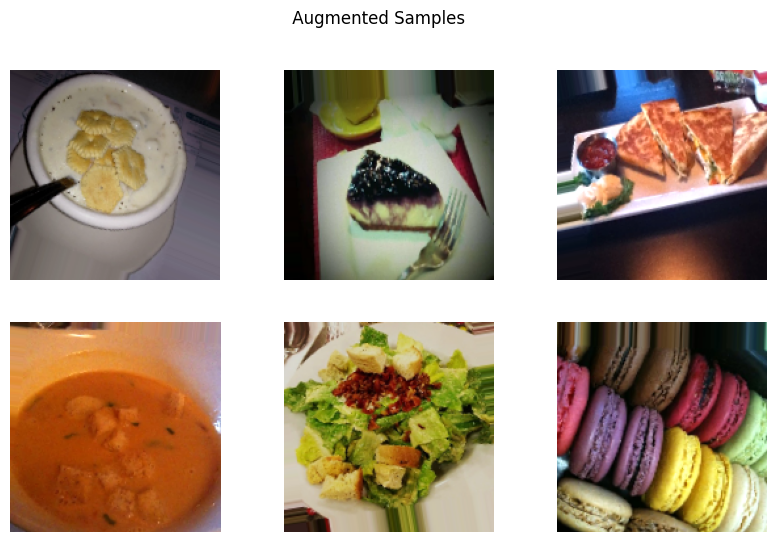

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_aug)
plt.figure(figsize=(10, 6))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle(" Augmented Samples")
plt.show()


In [ ]:
model.fit(train_aug, epochs=5, validation_data=val_aug)


Epoch 1/5
  4/247 ━━━━━━━━━━━━━━━━━━━━ 3:27 854ms/step - accuracy: 0.7018 - loss: 0.8050

KeyboardInterrupt: 

In [ ]:
# Unfreeze the base MobileNetV2 model
base_model.trainable = True

# Optionally: Freeze the bottom N layers, fine-tune only the top layers
fine_tune_at = 100  # Freeze first 100 layers

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(1e-5),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_fine = model.fit(train_aug, epochs=5, validation_data=val_aug)


Epoch 1/5
 15/247 ━━━━━━━━━━━━━━━━━━━━ 5:47 1s/step - accuracy: 0.5496 - loss: 1.7265

KeyboardInterrupt: 

In [ ]:
model.save("food11_mobilenetv2.h5")
